In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper import *
import cv2
import seaborn as sb

In [2]:
%%time
helmet_data= pd.read_csv('./train_baseline_helmets.csv')
tracking_data = pd.read_csv('./train_player_tracking.csv')
labels = pd.read_csv('./train_labels.csv')

CPU times: total: 5.42 s
Wall time: 5.57 s


In [3]:
print(f"length of helmet train data: {len(helmet_data)}")
print(f'unique games: {len(helmet_data["game_key"].unique())}')
print(f'unique plays: {len(helmet_data["play_id"].unique())}')
print(f'Earliest and Latest Frame with helmet information: {(helmet_data["frame"].min(), helmet_data["frame"].max())}')
helmet_data.head()

length of helmet train data: 3783616
unique games: 149
unique plays: 233
Earliest and Latest Frame with helmet information: (289, 1326)


,game_play,game_key,play_id,view,video,frame,nfl_player_id,player_label,left,width,top,height
0,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,39947,H72,946,25,293,34
1,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,37211,H42,151,25,267,33
2,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,38590,H70,810,25,293,35
3,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,44822,H15,681,26,254,33
4,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,41944,V92,680,23,303,33


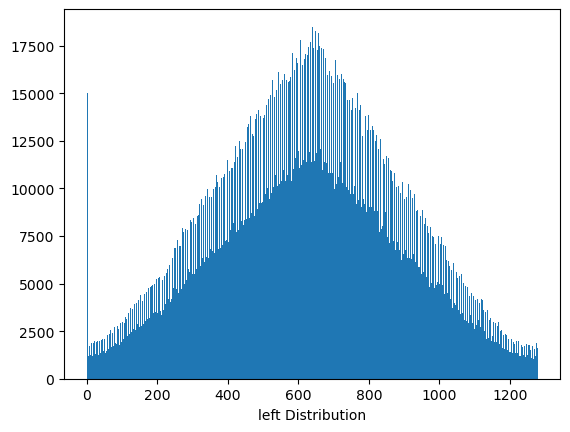

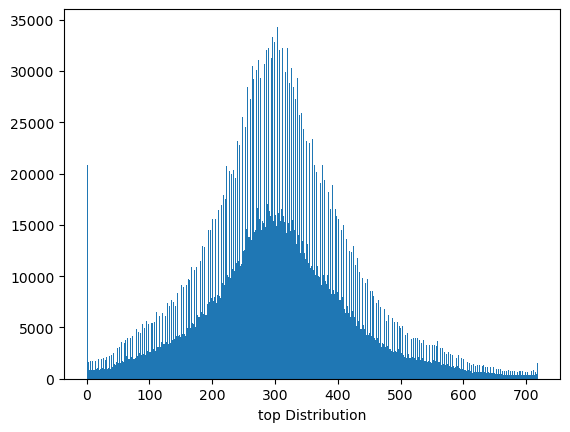

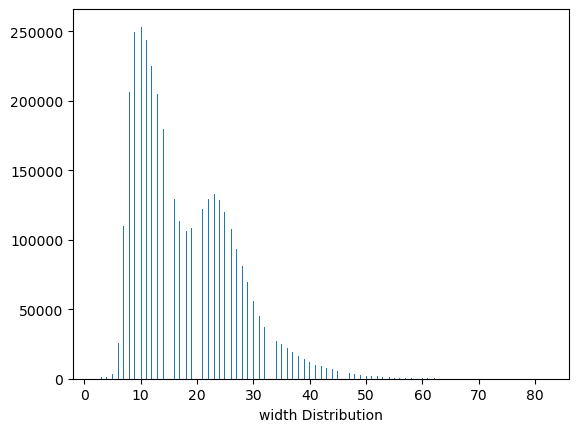

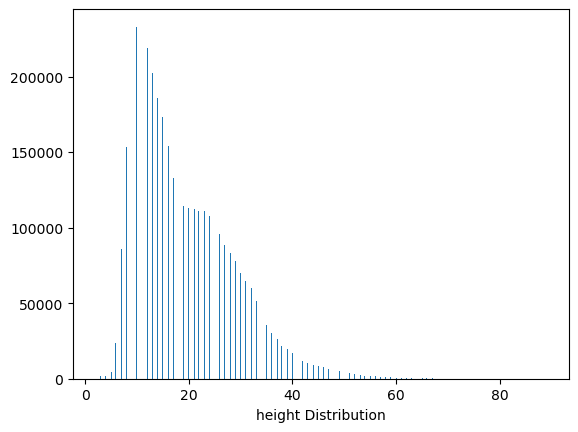

In [4]:
for feat in ['left', 'top', 'width', 'height']:
    plt.hist(helmet_data[feat].values, bins = 500)
    plt.xlabel(f'{feat} Distribution')
    plt.show()

In [5]:
game2play = {}
for game_play in helmet_data["game_key"].unique():
    game2play[game_play] = len(helmet_data[ helmet_data['game_key'] == game_play ]["play_id"].unique())

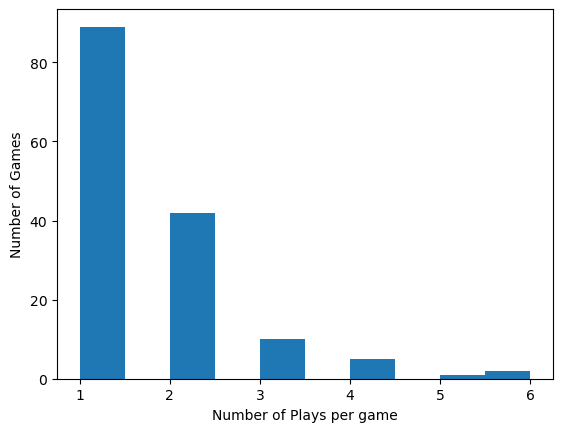

In [6]:
plt.hist(game2play.values())
plt.ylabel('Number of Games')
plt.xlabel('Number of Plays per game')
plt.show()

In [7]:
print(f'unique games: {len(tracking_data["game_key"].unique())}')
print(f'unique plays: {len(tracking_data["play_id"].unique())}')
print(f'Earliest and Latest Step with tracking information: {(tracking_data["step"].min(), tracking_data["step"].max())}')
print(f'different positions in the game: {tracking_data["position"].unique()}')
tracking_data.head()

unique games: 149
unique plays: 233
Earliest and Latest Step with tracking information: (-339, 692)
different positions in the game: ['CB' 'DE' 'FS' 'TE' 'ILB' 'OLB' 'T' 'G' 'C' 'QB' 'WR' 'RB' 'NT' 'DT'
 'MLB' 'SS' 'OT' 'LB' 'OG' 'SAF' 'DB' 'LS' 'K' 'P' 'FB' 'S' 'DL' 'HB']


,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
0,58580_001136,58580,1136,44830,2021-10-10T21:08:20.900Z,-108,away,CB,22,61.59,42.60,1.11,0.11,320.33,263.93,0.71,-0.64
1,58580_001136,58580,1136,47800,2021-10-10T21:08:20.900Z,-108,away,DE,97,59.48,26.81,0.23,0.01,346.84,247.16,1.29,0.90
2,58580_001136,58580,1136,52444,2021-10-10T21:08:20.900Z,-108,away,FS,29,72.19,31.46,0.61,0.06,11.77,247.69,0.63,-0.33
3,58580_001136,58580,1136,46206,2021-10-10T21:08:20.900Z,-108,home,TE,86,57.37,22.12,0.37,0.04,127.85,63.63,0.69,0.62
4,58580_001136,58580,1136,52663,2021-10-10T21:08:20.900Z,-108,away,ILB,48,63.25,27.50,0.51,0.05,183.62,253.71,0.31,0.31


#### Distributions of differnt values
only x,y position, speed, direction, acceleration, sa

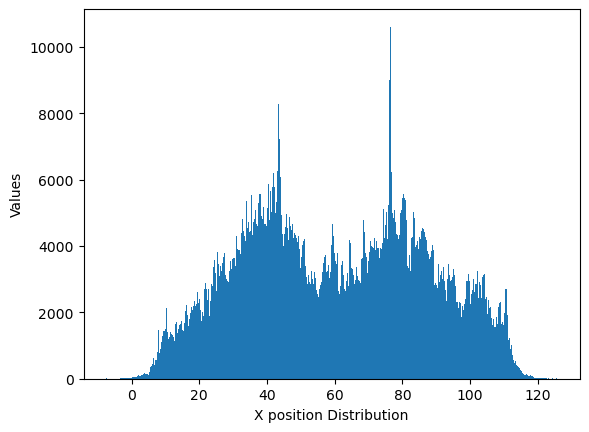

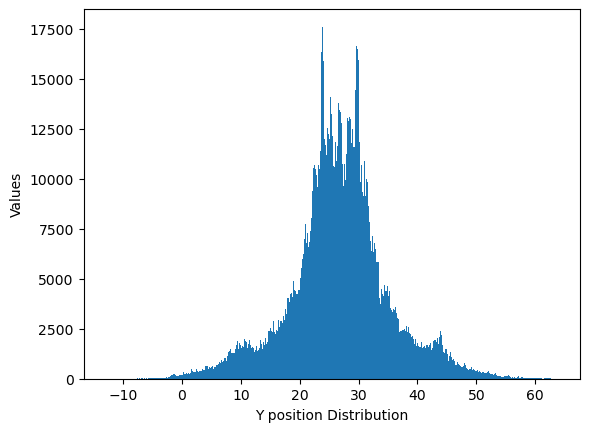

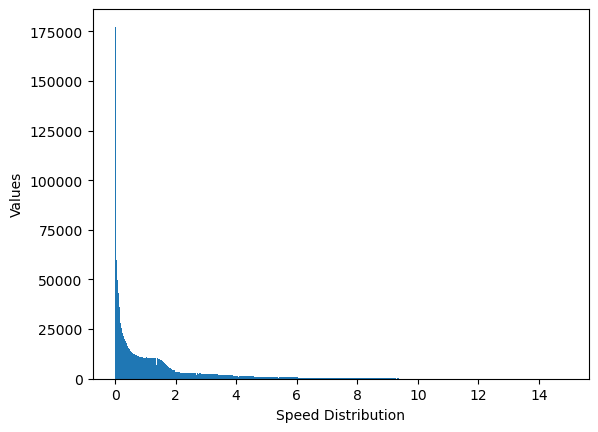

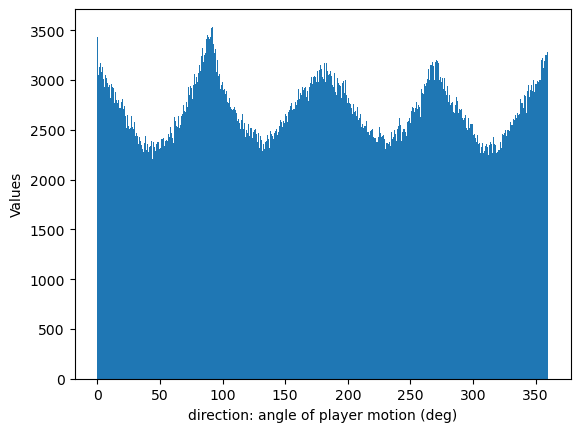

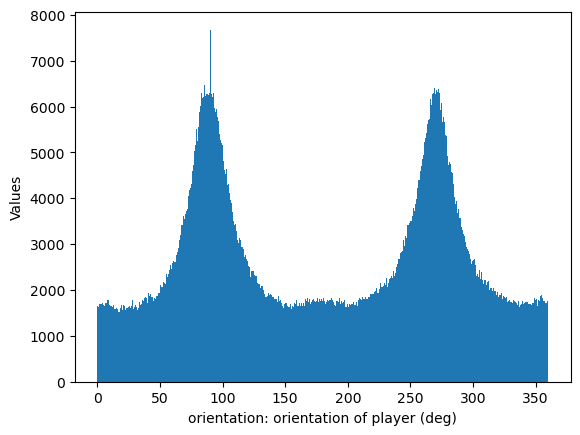

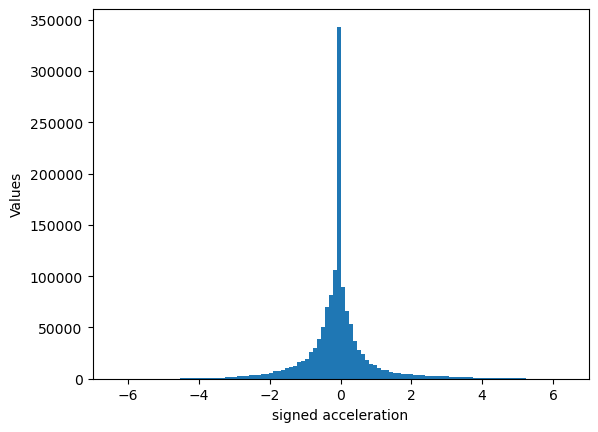

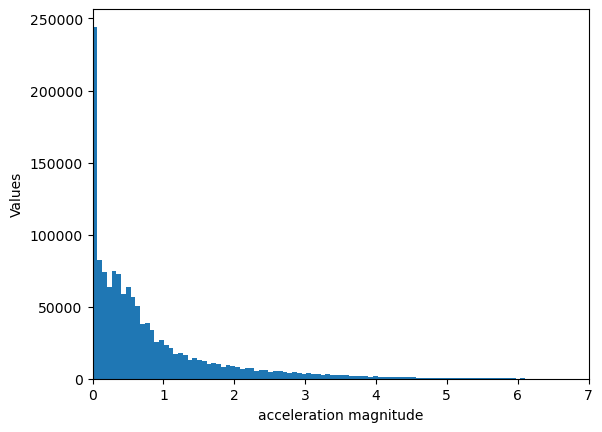

In [8]:
plt.style.use('default')

plt.hist(tracking_data['x_position'].values, bins = 500)
plt.ylabel('Values')
plt.xlabel('X position Distribution')
plt.show()

plt.hist(tracking_data['y_position'].values, bins = 500)
plt.ylabel('Values')
plt.xlabel('Y position Distribution')
plt.show()

plt.hist(tracking_data['speed'].values, bins = 500)
plt.ylabel('Values')
plt.xlabel('Speed Distribution')
plt.show()

plt.hist(tracking_data['direction'].values, bins = 500)
plt.ylabel('Values')
plt.xlabel('direction: angle of player motion (deg)')
plt.show()

plt.hist(tracking_data['orientation'].values, bins = 500)
plt.ylabel('Values')
plt.xlabel('orientation: orientation of player (deg)')
plt.show()

plt.hist(tracking_data['sa'].values, bins = 500)
plt.ylabel('Values')
plt.xlabel('signed acceleration')
plt.xlim(xmin=-7, xmax=7)
plt.show()

plt.hist(tracking_data['acceleration'].values, bins = 500)
plt.ylabel('Values')
plt.xlabel('acceleration magnitude')
plt.xlim(xmin=0, xmax=7)
plt.show()

In [9]:
labels.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0


In [10]:
%%time
label_exp = expand_contact_id(labels)
label_exp

Wall time: 24.2 s


,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0
...,...,...,...,...,...,...,...
4721613,58582_003121_91_48220_G,58582_003121,2021-10-12T02:42:29.100Z,91,48220,G,0
4721614,58582_003121_91_47906_G,58582_003121,2021-10-12T02:42:29.100Z,91,47906,G,0
4721615,58582_003121_91_38557_G,58582_003121,2021-10-12T02:42:29.100Z,91,38557,G,0
4721616,58582_003121_91_47872_G,58582_003121,2021-10-12T02:42:29.100Z,91,47872,G,0


In [11]:
%%time
use_cols = [
    'x_position', 'y_position', 'speed', 'distance',
    'direction', 'orientation', 'acceleration', 'sa',
    'team', 'position'
]
combined_df = create_features(label_exp, tracking_data, use_cols=use_cols)

Wall time: 18.5 s


In [12]:
print(f'first row of df: {combined_df.columns}')
print(f'size of df  = {combined_df.shape}')
combined_df.head()

first row of df: Index(['contact_id', 'game_play', 'datetime', 'step', 'nfl_player_id_1',
       'nfl_player_id_2', 'contact', 'x_position_1', 'y_position_1', 'speed_1',
       'distance_1', 'direction_1', 'orientation_1', 'acceleration_1', 'sa_1',
       'team_1', 'position_1', 'x_position_2', 'y_position_2', 'speed_2',
       'distance_2', 'direction_2', 'orientation_2', 'acceleration_2', 'sa_2',
       'team_2', 'position_2', 'rel_pos_x', 'rel_pos_y', 'rel_pos_mag',
       'rel_pos_ori', 'rel_speed_x', 'rel_speed_y', 'rel_speed_mag',
       'rel_speed_ori', 'rel_acceleration_x', 'rel_acceleration_y',
       'rel_acceleration_mag', 'rel_acceleration_ori', 'G_flug'],
      dtype='object')
size of df  = (4721618, 40)


,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,x_position_1,y_position_1,speed_1,...,rel_pos_ori,rel_speed_x,rel_speed_y,rel_speed_mag,rel_speed_ori,rel_acceleration_x,rel_acceleration_y,rel_acceleration_mag,rel_acceleration_ori,G_flug
0,58168_003392_0_37084_37211,58168_003392,2020-09-11T03:01:48.100Z,0,37084,37211,0,41.9,20.08,0.54,...,52.495846,0.891354,0.213046,0.916461,13.442289,1.892315,0.734597,2.029898,21.216211,False
1,58168_003392_0_37084_38556,58168_003392,2020-09-11T03:01:48.100Z,0,37084,38556,0,41.9,20.08,0.54,...,89.836759,0.016004,0.247198,0.247715,86.295527,0.565571,0.834208,1.007856,55.863711,False
2,58168_003392_0_37084_38567,58168_003392,2020-09-11T03:01:48.100Z,0,37084,38567,0,41.9,20.08,0.54,...,7.447412,0.968183,0.319658,1.019588,18.271264,1.495569,0.381257,1.543400,14.301488,False
3,58168_003392_0_37084_38590,58168_003392,2020-09-11T03:01:48.100Z,0,37084,38590,0,41.9,20.08,0.54,...,73.199713,0.842225,0.243900,0.876829,16.150477,1.248991,0.185296,1.262661,8.438645,False
4,58168_003392_0_37084_39947,58168_003392,2020-09-11T03:01:48.100Z,0,37084,39947,0,41.9,20.08,0.54,...,74.934594,0.798705,0.787968,1.121973,44.612240,1.358851,1.336076,1.905669,44.515791,False


max distance where contact is possible 5.8148946680056035


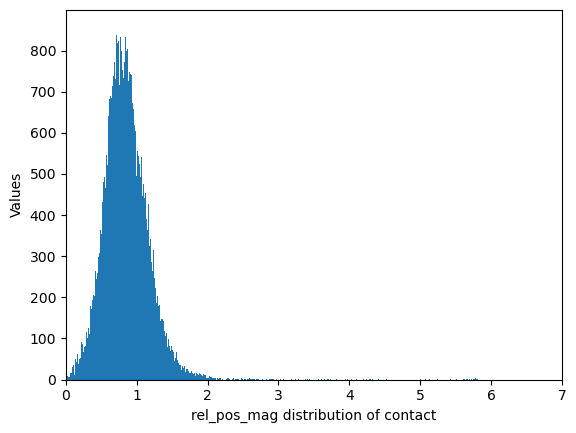

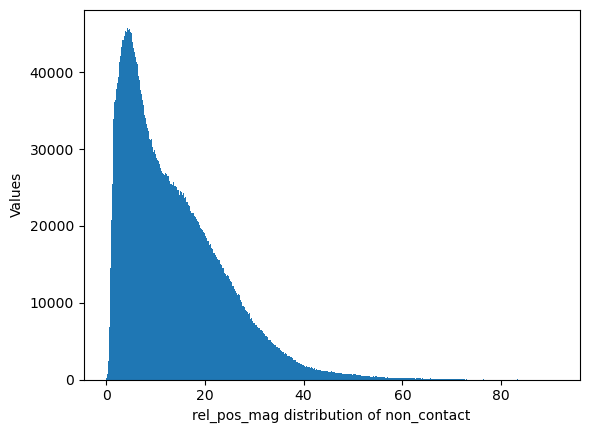

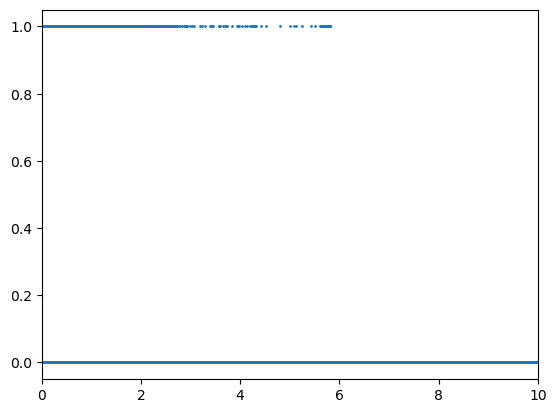

percentage of nans for rel_pos_mag = 26.06


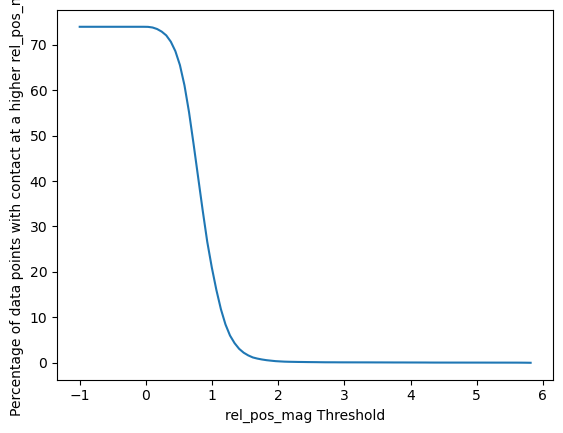

max distance where contact is possible 10.167801613336955


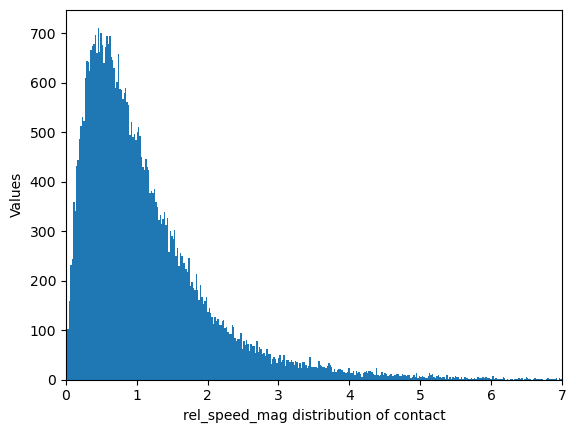

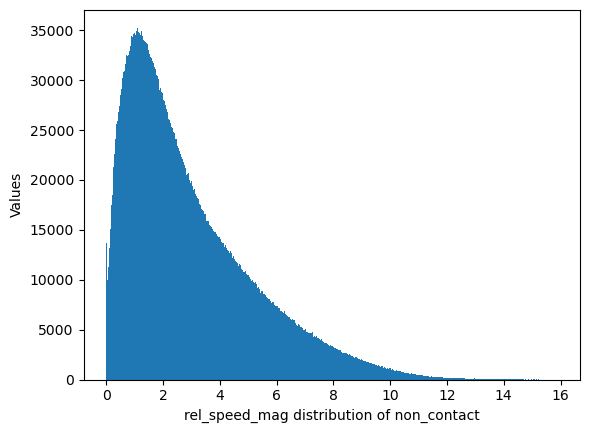

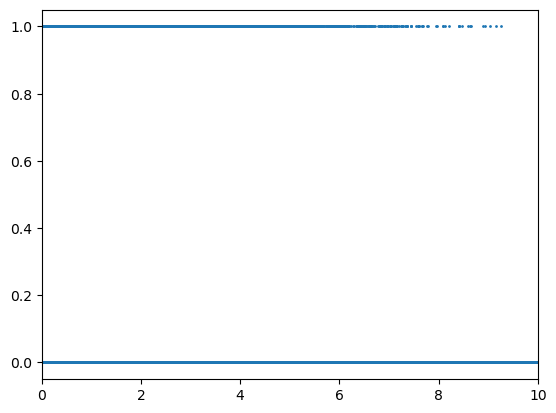

percentage of nans for rel_speed_mag = 26.06


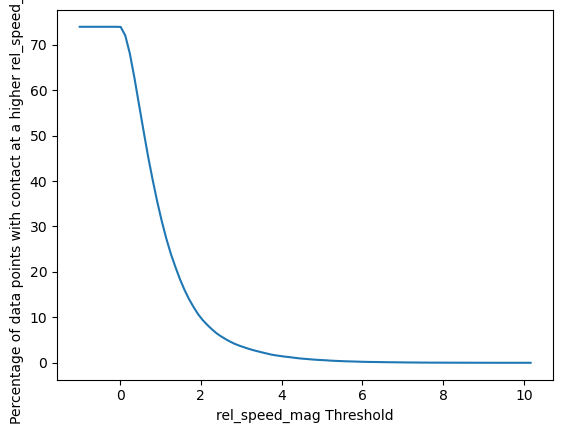

max distance where contact is possible 21.292352900120857


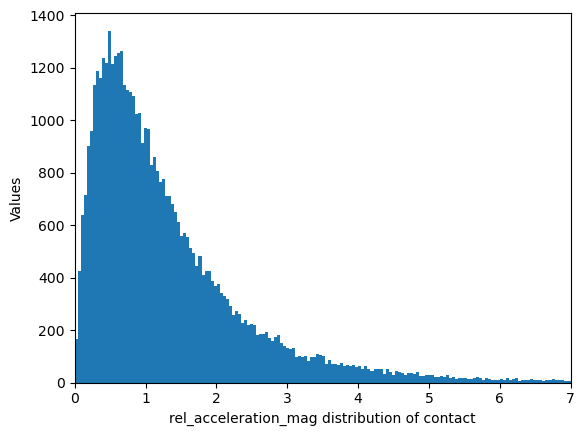

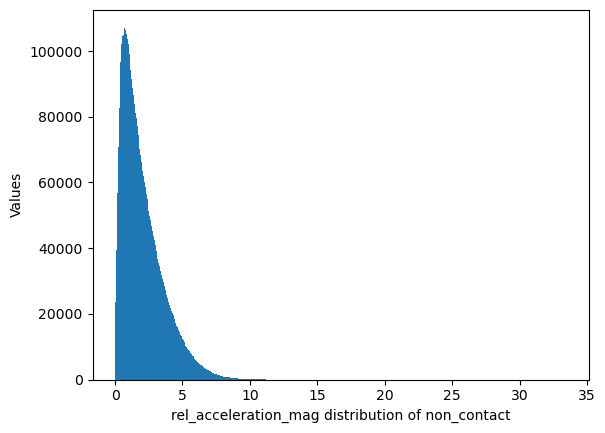

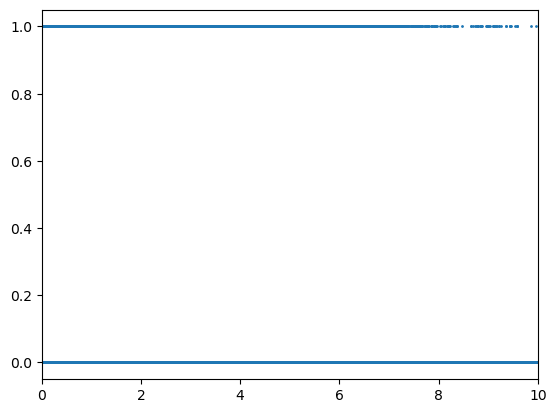

percentage of nans for rel_acceleration_mag = 26.06


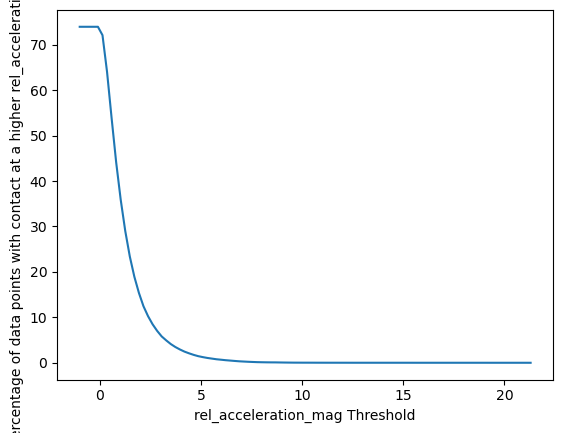

In [16]:
plt.style.use('default')
features = ['rel_pos_mag','rel_speed_mag','rel_acceleration_mag']

for feat in features:
    
    print(f'max distance where contact is possible {combined_df[combined_df["contact"] == 1 ][feat].max()}')
    
    plt.hist(combined_df[combined_df["contact"] == 1 ][feat].values, bins=500)
    plt.ylabel('Values')
    plt.xlabel(f'{feat} distribution of contact')
    plt.xlim(xmin=0, xmax=7)
    plt.show()

    plt.hist(combined_df[combined_df["contact"] == 0 ][feat].values, bins=500)
    plt.ylabel('Values')
    plt.xlabel(f'{feat} distribution of non_contact')
    plt.show()

    plt.scatter(combined_df[feat], combined_df['contact'], s=1)
    plt.xlim(xmin = 0, xmax= 10)
    plt.show()
    
    distance_values = combined_df[combined_df["contact"] == 1 ][feat]
    print(f'percentage of nans for {feat} = {100*distance_values.isnull().sum()/len(distance_values):.2f}')
    percentage_calc = lambda thresh: 100*np.sum(distance_values > thresh)/len(distance_values)

    thresholds = np.linspace(-1, combined_df[combined_df["contact"] == 1 ][feat].max(), 100)
    percentages = np.array([percentage_calc(thresh) for thresh in thresholds])

    plt.plot(thresholds, percentages)
    plt.xlabel(f'{feat} Threshold')
    plt.ylabel(f'Percentage of data points with contact at a higher {feat}')
    plt.show()

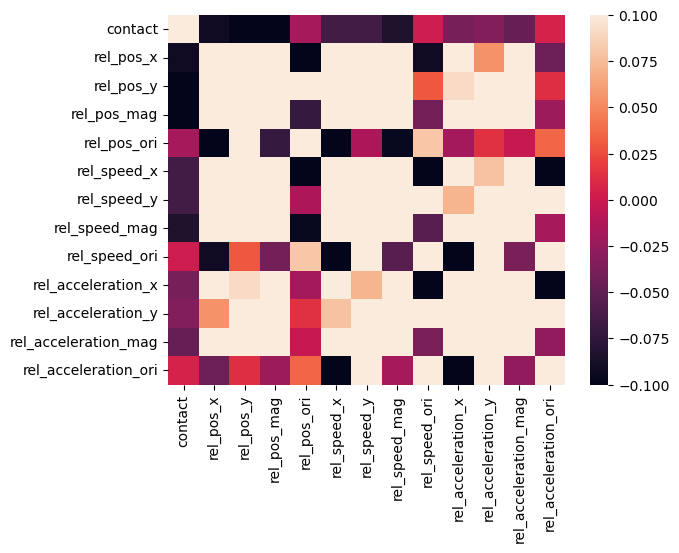

In [14]:
ax = sb.heatmap(combined_df.loc[:,['contact','rel_pos_x', 'rel_pos_y', 'rel_pos_mag',
       'rel_pos_ori', 'rel_speed_x', 'rel_speed_y', 'rel_speed_mag',
       'rel_speed_ori', 'rel_acceleration_x', 'rel_acceleration_y',
       'rel_acceleration_mag', 'rel_acceleration_ori']].corr(), vmin=-0.1, vmax=0.1)
plt.show()

In [15]:
print(f'Unique distance values if player is ground :{combined_df[combined_df["G_flug"]]["rel_pos_mag"].unique()}')
print(f'Unique g_flug values if distance is nan :{combined_df[combined_df["rel_pos_mag"].isnull()]["G_flug"].unique()}')
print("Details of Ground Player:")
print(combined_df[combined_df["G_flug"]].reset_index().loc[0])

Unique distance values if player is ground :[nan]
Unique g_flug values if distance is nan :[ True]
Details of Ground Player:
index                                         21
contact_id                58168_003392_0_37084_G
game_play                           58168_003392
datetime                2020-09-11T03:01:48.100Z
step                                           0
nfl_player_id_1                            37084
nfl_player_id_2                                G
contact                                        0
x_position_1                                41.9
y_position_1                               20.08
speed_1                                     0.54
distance_1                                  0.06
direction_1                               252.69
orientation_1                             262.31
acceleration_1                              0.92
sa_1                                         0.9
team_1                                      away
position_1                                

In [3]:
%%time 
combined_df = pd.read_csv('./combined_df.csv')

Wall time: 1.64 s


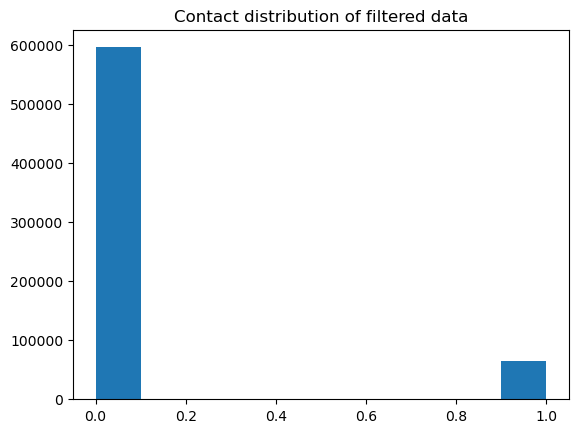

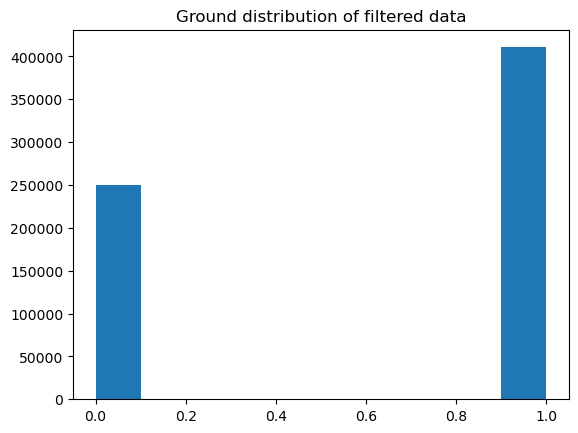

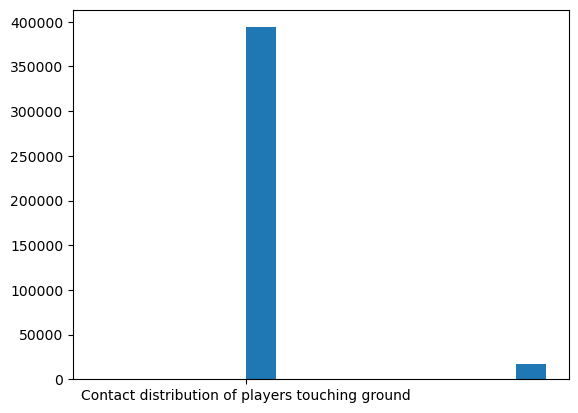

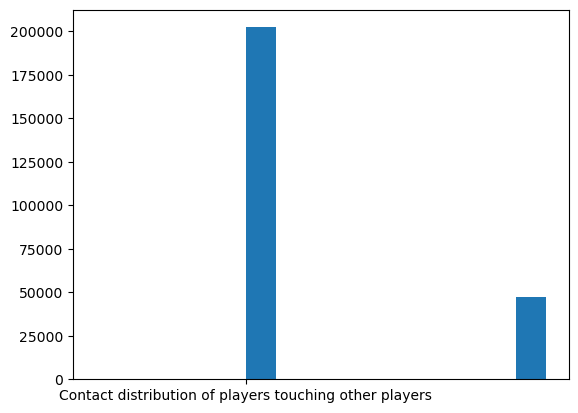

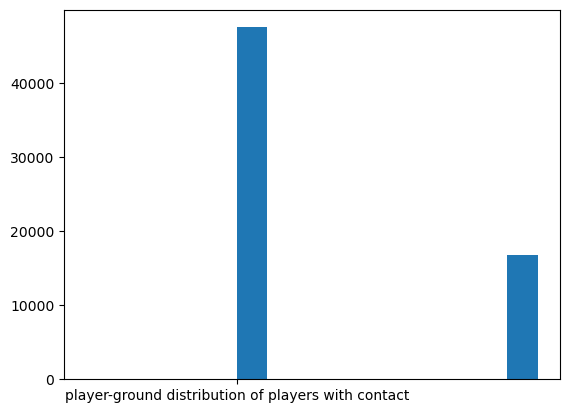

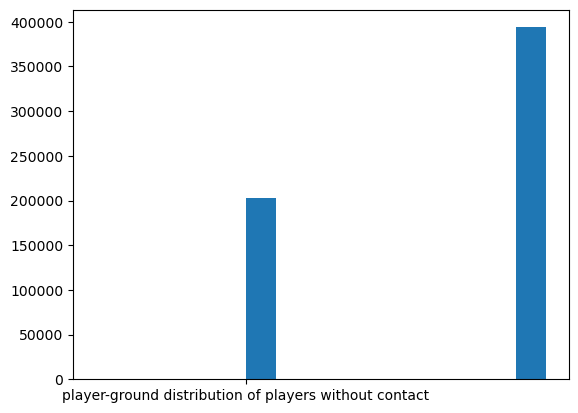

In [55]:
plt.hist(combined_df['contact'])
plt.title('Contact distribution of filtered data')
plt.show()
plt.hist(combined_df['G_flug']*1)
plt.title('Ground distribution of filtered data')
plt.show()
plt.hist(combined_df[combined_df['G_flug'] == True]['contact'])
plt.hist('Contact distribution of players touching ground')
plt.show()
plt.hist(combined_df[combined_df['G_flug'] == False]['contact'])
plt.hist('Contact distribution of players touching other players')
plt.show()
plt.hist(combined_df[combined_df['contact'] == 1]['G_flug']*1)
plt.hist('player-ground distribution of players with contact')
plt.show()
plt.hist(combined_df[combined_df['contact'] == 0]['G_flug']*1)
plt.hist('player-ground distribution of players without contact')
plt.show()


In [66]:
print(f'size of filtered dataset: {combined_df.shape[0]}')
combined_df.head()

size of filtered dataset: 660553


,Unnamed: 0,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,x_position_1,y_position_1,...,rel_speed_x,rel_speed_y,rel_speed_mag,rel_speed_ori,rel_acceleration_x,rel_acceleration_y,rel_acceleration_mag,rel_acceleration_ori,G_flug,frame
0,0,58168_003392_0_37084_38567,58168_003392,2020-09-11T03:01:48.100Z,0,37084,38567,0,41.90,20.08,...,0.968183,0.319658,1.019588,18.271264,1.495569,0.381257,1.543400,14.301488,False,300
1,1,58168_003392_0_37084_G,58168_003392,2020-09-11T03:01:48.100Z,0,37084,G,0,41.90,20.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,300
2,2,58168_003392_0_37211_46445,58168_003392,2020-09-11T03:01:48.100Z,0,37211,46445,0,39.59,17.07,...,0.191882,0.568473,0.599983,71.348359,0.033670,0.730436,0.731212,87.360703,False,300
3,3,58168_003392_0_37211_G,58168_003392,2020-09-11T03:01:48.100Z,0,37211,G,0,39.59,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,300
4,4,58168_003392_0_38556_G,58168_003392,2020-09-11T03:01:48.100Z,0,38556,G,0,41.93,30.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,300


In [10]:
def add_bboxes_details(frame, player1, player2, game_play, view):
    bboxes = []
    query = f"frame == {frame} and game_play == '{game_play}'"
    if player2 == 'G':
        query += f"  and nfl_player_id in ({player1}, 'G')"
    else:
        query += f"  and nfl_player_id in ({player1}, {player2})"
    filt = helmet_data.query(query)

    tmp = filt[filt["view"] == view][['left','width','top','height']]
    return tmp

Unnamed: 0                                    99
contact_id                58168_003392_2_47837_G
game_play                           58168_003392
datetime                2020-09-11T03:01:48.300Z
step                                           2
nfl_player_id_1                            47837
nfl_player_id_2                                G
contact                                        0
x_position_1                               43.96
y_position_1                                38.7
speed_1                                      0.6
distance_1                                  0.06
direction_1                               114.19
orientation_1                             274.35
acceleration_1                              1.13
sa_1                                        1.13
team_1                                      away
position_1                                    DB
x_position_2                                 NaN
y_position_2                                 NaN
speed_2             

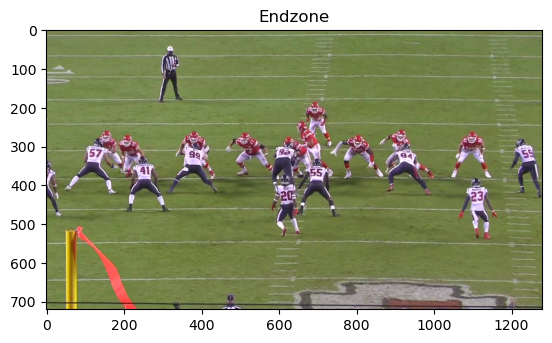

here is the bb 660 13 170 16


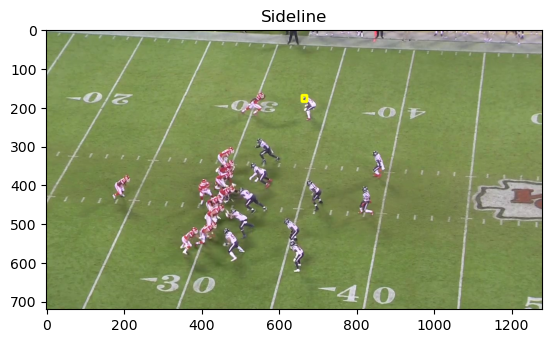

In [68]:
index = combined_df.index[combined_df['contact_id'] == '58168_003392_2_47837_G'].tolist()[0]
row = combined_df.loc[index]
print(row)
for view in ['Endzone','Sideline']:
    bbox = add_bboxes_details(row['frame'],row['nfl_player_id_1'],row['nfl_player_id_2'],row['game_play'], view)
    video = row['game_play'] +  f'_{view}.mp4'
    path = f'./work/train_frames/{video}_{row["frame"]:04d}.jpg'
    img = cv2.imread(path)

    for i in bbox.to_numpy():
        x,w,y,h = np.array(i, dtype=int)
        print("here is the bb", x,w,y,h)
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,255), 5)
    plt.imshow(img[:, :, ::-1])
    plt.title(view)
    plt.show()

In [64]:
combined_df.loc[(combined_df['contact']==0) & (combined_df['G_flug']==True)]

,Unnamed: 0,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,x_position_1,y_position_1,...,rel_speed_x,rel_speed_y,rel_speed_mag,rel_speed_ori,rel_acceleration_x,rel_acceleration_y,rel_acceleration_mag,rel_acceleration_ori,G_flug,frame
1,1,58168_003392_0_37084_G,58168_003392,2020-09-11T03:01:48.100Z,0,37084,G,0,41.90,20.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,300
3,3,58168_003392_0_37211_G,58168_003392,2020-09-11T03:01:48.100Z,0,37211,G,0,39.59,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,300
4,4,58168_003392_0_38556_G,58168_003392,2020-09-11T03:01:48.100Z,0,38556,G,0,41.93,30.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,300
7,7,58168_003392_0_38567_G,58168_003392,2020-09-11T03:01:48.100Z,0,38567,G,0,40.37,19.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,300
11,11,58168_003392_0_38590_G,58168_003392,2020-09-11T03:01:48.100Z,0,38590,G,0,40.33,25.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660548,660548,58582_003121_91_48220_G,58582_003121,2021-10-12T02:42:29.100Z,91,48220,G,0,33.18,25.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,846
660549,660549,58582_003121_91_52493_G,58582_003121,2021-10-12T02:42:29.100Z,91,52493,G,0,65.04,38.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,846
660550,660550,58582_003121_91_52500_G,58582_003121,2021-10-12T02:42:29.100Z,91,52500,G,0,58.74,40.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,846
660551,660551,58582_003121_91_52609_G,58582_003121,2021-10-12T02:42:29.100Z,91,52609,G,0,60.32,25.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,846
